<a href="https://colab.research.google.com/github/hang-1n-there/pytorch_learn/blob/main/DNN_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['class'] = cancer.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
data = torch.from_numpy(df.values).float()

x = data[:,:-1]
y = data[:,-1:]

print(x.shape, y.shape)

torch.Size([569, 30]) torch.Size([569, 1])


In [ ]:
ratios = [0.6,0.2,0.2]

train_cnt = int(data.size(0) * ratios[0])
valid_cnt = int(data.size(0) * ratios[1])
test_cnt = data.size(0) - train_cnt - valid_cnt
cnts = [train_cnt, valid_cnt, test_cnt]

print('Train : {:d}, Valid : {:d}, Test : {:d}'.format(train_cnt,valid_cnt,test_cnt))

Train : 341, Valid : 113, Test : 115


In [ ]:
indices = torch.randperm(data.size(0))

x = torch.index_select(x, dim=0, index=indices)
y = torch.index_select(y, dim=0, index=indices)

x = x.split(cnts, dim=0)
y = y.split(cnts, dim=0)

for x_i, y_i in zip(x,y):
  print(x_i.size(), y_i.size())

torch.Size([341, 30]) torch.Size([341, 1])
torch.Size([113, 30]) torch.Size([113, 1])
torch.Size([115, 30]) torch.Size([115, 1])


In [ ]:
# fit은 데이터를 학습시키는 메서드이기 때문에 trainset에만 적용하고, transform은 실제로 학습한 것을 적용시키는 메서드이기 때문에 trainset에서 학습한 내용을 valid, test에도 적용시킨다.
scaler = StandardScaler()
scaler.fit(x[0].numpy())

x = [ torch.from_numpy(scaler.transform(x[0].numpy())),
      torch.from_numpy(scaler.transform(x[1].numpy())),
      torch.from_numpy(scaler.transform(x[2].numpy())) ]

df = pd.DataFrame(x[0].numpy(), columns = cancer.feature_names)
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
336,-1.304157,-0.740895,-1.316666,-1.080597,-0.833020,-1.169793,-0.882597,-0.829172,-0.977437,0.163900,...,-1.211783,-1.018226,-1.259067,-0.979823,0.792861,-0.987564,-0.935367,-0.649898,-0.272921,-0.124479
337,-0.498923,0.626448,-0.500359,-0.537782,-0.619400,-0.196493,-0.368313,-0.300424,0.371635,0.165304,...,-0.507676,0.832978,-0.475602,-0.545096,-0.088963,-0.066044,-0.164657,0.072747,0.061636,0.456817
338,-0.363419,0.749486,-0.271776,-0.429801,0.842653,1.355736,0.920639,0.492443,1.058629,1.358602,...,-0.217126,0.775842,-0.054018,-0.306069,1.996552,1.689813,1.561691,1.228259,0.738532,2.157766
339,0.587986,0.366444,0.680930,0.430552,1.411383,1.760823,0.952465,1.362408,1.204571,1.501798,...,1.004457,0.992959,0.905512,0.802595,2.049462,1.013077,0.889636,1.371950,1.203801,1.615652
340,1.968965,1.390210,2.136684,2.026108,0.918946,2.149562,2.663994,2.497257,1.151177,0.832148,...,1.710686,0.655041,2.194024,1.720109,0.365176,0.984422,1.703908,2.073939,-0.005275,0.785305


In [ ]:
model = nn.Sequential(
    nn.Linear(x[0].size(-1), 25),
    nn.LeakyReLU(),
    nn.Linear(25,20),
    nn.LeakyReLU(),
    nn.Linear(20,15),
    nn.LeakyReLU(),
    nn.Linear(15,10),
    nn.LeakyReLU(),
    nn.Linear(10,5),
    nn.LeakyReLU(),
    nn.Linear(5,y[0].size(-1)),
    nn.Sigmoid() # 이진분류이기 때문에 마지막에 sigmoid 함수를 적용
)
model

Sequential(
  (0): Linear(in_features=30, out_features=25, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=25, out_features=20, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=20, out_features=15, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=15, out_features=10, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=10, out_features=5, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=5, out_features=1, bias=True)
  (11): Sigmoid()
)

In [ ]:
optimizer = optim.Adam(model.parameters())

In [ ]:
n_epoch = 10000
batch_size = 32
print_interval = 100
early_stop = 1000

In [ ]:
from copy import deepcopy

# np.inf : 무한대
lowest_loss, lowest_epoch = np.inf,np.inf
best_model = None

In [ ]:
train_history, valid_history = [],[]

for i in range(n_epoch):
  indices = torch.randperm(x[0].size(0))
  x_ = torch.index_select(x[0], dim=0, index=indices)
  y_ = torch.index_select(y[0], dim=0, index=indices)

  x_ = x_.split(batch_size, dim=0)
  y_ = y_.split(batch_size, dim=0)
  train_loss, valid_loss = 0,0
  y_hat=[]

  for x_i, y_i in zip(x_,y_):
    y_hat_i = model(x_i)
    loss = F.binary_cross_entropy(y_hat_i, y_i)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss += float(loss)
  train_loss = train_loss / len(x_)

  with torch.no_grad():
    x_ = x[1].split(batch_size, dim=0)
    y_ = y[1].split(batch_size, dim=0)

    valid_loss = 0

    for x_i,y_i in zip(x_,y_):
      y_hat_i = model(x_i)
      loss = F.binary_cross_entropy(y_hat_i,y_i)

      valid_loss += float(loss)

    valid_loss = valid_loss / len(x_)

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i+1) % print_interval == 0 :
      print('Epoch : {:d}, Train_loss : {:.4e}, Valid_loss : {:.4e}, lowest_loss : {:.4e}'.format(i+1, train_loss, valid_loss, lowest_loss))
    
    if valid_loss <= lowest_loss :
      lowest_loss = valid_loss
      lowest_epoch = i

      best_model = deepcopy(model.state_dict())
    else :
      if early_stop > 0 and lowest_epoch + early_stop < i+1:
        print('더이상 train_loss와 valid_loss가 갱신되지 않습니다.')
        break
print('가장 좋은 validation loss와 epoch은 {:.4e}, {:d} 입니다.'.format(lowest_loss, lowest_epoch+1))
model.load_state_dict(best_model)

Epoch : 100, Train_loss : 2.1167e-04, Valid_loss : 3.8971e-01, lowest_loss : 1.1304e-01
Epoch : 200, Train_loss : 2.9364e-05, Valid_loss : 1.0989e+00, lowest_loss : 1.1304e-01
Epoch : 300, Train_loss : 8.5157e-06, Valid_loss : 1.7692e+00, lowest_loss : 1.1304e-01
Epoch : 400, Train_loss : 3.2698e-06, Valid_loss : 1.7784e+00, lowest_loss : 1.1304e-01
Epoch : 500, Train_loss : 1.4202e-06, Valid_loss : 1.7856e+00, lowest_loss : 1.1304e-01
Epoch : 600, Train_loss : 6.6568e-07, Valid_loss : 1.7919e+00, lowest_loss : 1.1304e-01
Epoch : 700, Train_loss : 4.3222e-07, Valid_loss : 1.7976e+00, lowest_loss : 1.1304e-01
Epoch : 800, Train_loss : 1.6351e-07, Valid_loss : 1.8028e+00, lowest_loss : 1.1304e-01
Epoch : 900, Train_loss : 8.3497e-08, Valid_loss : 1.8080e+00, lowest_loss : 1.1304e-01
Epoch : 1000, Train_loss : 4.3930e-08, Valid_loss : 1.8135e+00, lowest_loss : 1.1304e-01
더이상 train_loss와 valid_loss가 갱신되지 않습니다.
가장 좋은 validation loss와 epoch은 1.1304e-01, 13 입니다.


<All keys matched successfully>

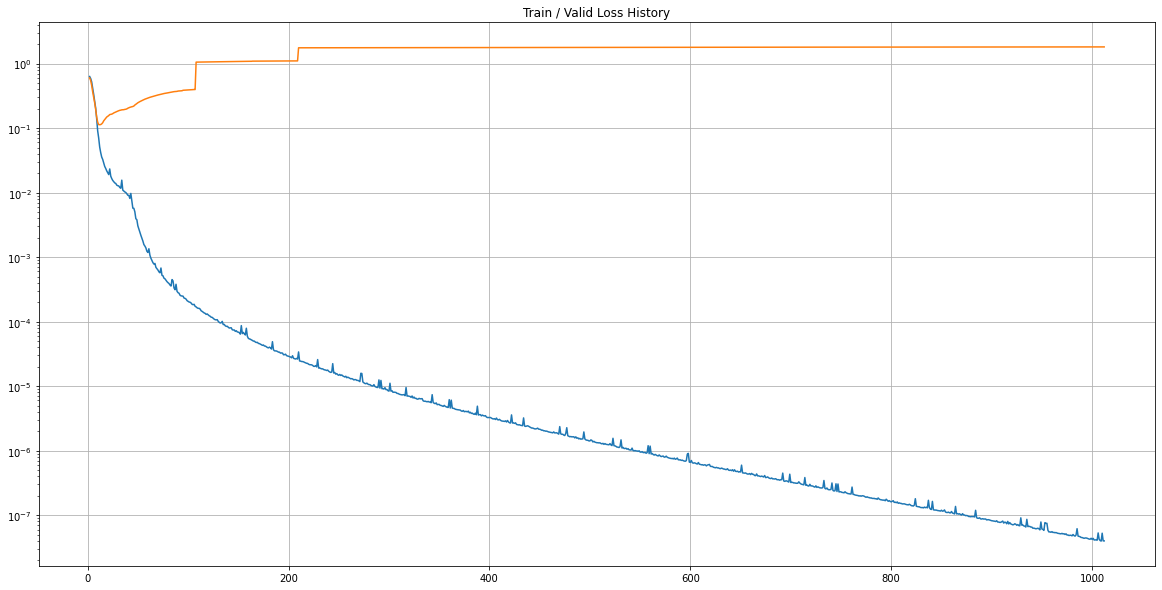

In [ ]:
plot_from = 2
plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('Train / Valid Loss History')
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],
)
plt.yscale('log')
plt.show()

In [ ]:
test_loss = 0
y_hat = []

with torch.no_grad():
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        test_loss += loss # Gradient is already detached.

        y_hat += [y_hat_i]

test_loss = test_loss / len(x_)
y_hat = torch.cat(y_hat, dim=0)

print("Test loss: %.4e" % test_loss)

Test loss: 1.5184e-01


In [ ]:
correct_cnt = (y[2] == (y_hat > .5)).sum()
total_cnt = float(y[2].size(0))

print('Accuracy : {:f}'.format(correct_cnt / total_cnt))

Accuracy : 0.973913


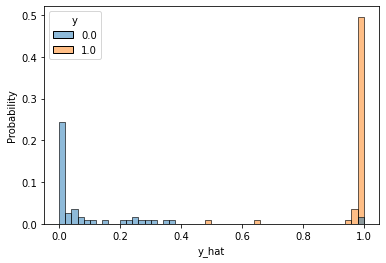

In [ ]:
df = pd.DataFrame(torch.cat([y[2], y_hat], dim=1).detach().numpy(), columns=['y', 'y_hat'])
sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(df.values[:,0], df.values[:,1])

0.9892769607843137